In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Travel details dataset.csv')

In [3]:
df.sample(3)

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
67,68,New York,7/20/2024,7/26/2024,6.0,James Chen,25.0,Male,American,Vacation rental,1000,Plane,800
121,122,"Cancun, Mexico",8/8/2022,8/16/2022,8.0,Frank Li,41.0,Male,American,Hotel,1300,Plane,600
126,127,"Bali, Indonesia",2/10/2023,2/18/2023,8.0,Katie Johnson,33.0,Female,Canadian,Hotel,800,Plane,800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


1. need to correct all the data types for some columns: start date, end date, traveller age, Accommodation cost, transportation cost.
2. handle missing values.

In [5]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Trip_ID', 'Destination', 'Start_date', 'End_date', 'Duration_(days)',
       'Traveler_name', 'Traveler_age', 'Traveler_gender',
       'Traveler_nationality', 'Accommodation_type', 'Accommodation_cost',
       'Transportation_type', 'Transportation_cost'],
      dtype='object')

In [6]:
df[df['Transportation_type'].isnull()]

,Trip_ID,Destination,Start_date,End_date,Duration_(days),Traveler_name,Traveler_age,Traveler_gender,Traveler_nationality,Accommodation_type,Accommodation_cost,Transportation_type,Transportation_cost
71,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,83,"Rome, Italy",4/15/2025,4/22/2025,7.0,James Kim,41.0,Male,American,Hotel,100,NaN,NaN
127,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. 2 data points a actually that null values, there is no data in it.
2. 1 data point is kind off look like an advance booking, because the date is of 2025. But it is still doesn't contain complete data.
dropping all 3 null values.

In [7]:
df.duplicated().sum()

0

In [8]:
df.dropna(inplace = True)

In [9]:
df[df['Trip_ID'] == 83]

,Trip_ID,Destination,Start_date,End_date,Duration_(days),Traveler_name,Traveler_age,Traveler_gender,Traveler_nationality,Accommodation_type,Accommodation_cost,Transportation_type,Transportation_cost


In [10]:
df['Start_date'] = pd.to_datetime(df['Start_date'], format='%m/%d/%Y')
df['End_date'] = pd.to_datetime(df['End_date'], format='%m/%d/%Y')

In [11]:
df['Traveler_age'] = df['Traveler_age'].astype(int)
df['Duration_(days)'] = df['Duration_(days)'].astype(int)

In [12]:
df['Transportation_type'].value_counts()

,count
Transportation_type,
Plane,57
Train,37
Flight,13
Car rental,13
Bus,6
Airplane,5
Car,3
Subway,1
Ferry,1


In [13]:
df['Transportation_type'] = df['Transportation_type'].replace('Plane','Airplane')
df['Transportation_type'] = df['Transportation_type'].replace('Flight','Airplane')
df['Transportation_type'] = df['Transportation_type'].replace('Car rental','Car')


In [14]:
df['Accommodation_cost'] = df['Accommodation_cost'].str.replace(r'[^\d.]', '', regex=True).astype(int)
df['Transportation_cost'] = df['Transportation_cost'].str.replace(r'[^\d.]', '', regex=True).astype(int)

In [15]:
df.sample(3)

,Trip_ID,Destination,Start_date,End_date,Duration_(days),Traveler_name,Traveler_age,Traveler_gender,Traveler_nationality,Accommodation_type,Accommodation_cost,Transportation_type,Transportation_cost
59,60,"Rome, Italy",2024-07-15,2024-07-23,8,Sofia Rossi,33,Female,Italian,Airbnb,800,Train,100
49,50,"Paris, France",2023-08-15,2023-08-22,7,Jennifer Nguyen,31,Female,Canadian,Hotel,1200,Train,300
129,130,"Tokyo, Japan",2023-05-15,2023-05-22,7,Jane Smith,28,Female,British,Airbnb,7000,Train,1500


In [16]:
df['Traveler_nationality'].value_counts()

,count
Traveler_nationality,
American,23
Korean,13
British,12
Canadian,9
Australian,8
Spanish,7
Chinese,7
Italian,4
Brazilian,4


In [17]:
df['Traveler_nationality'] = df['Traveler_nationality'].replace('UK','British')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('United Kingdom','British')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('United Arab Emirates','Emiratis')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('Emiratis','Emirati')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('South Korea','Korean')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('South Korean','Korean')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('Dutch','Nederlander')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('Germany','German')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('Italy','Italian')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('Greece','Greeks')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('China','Chinese')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('Japan','Japanese')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('Spain','Spanish')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('Brazil','Brazilian')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('Canada','Canadians ')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('Taiwan','Taiwanese')
df['Traveler_nationality'] = df['Traveler_nationality'].replace('USA','American')

In [18]:
df['Destination'].value_counts()

,count
Destination,
Paris,7
Bali,7
"Tokyo, Japan",7
"Paris, France",7
Tokyo,5
Sydney,5
Rome,5
New York,5
"Bali, Indonesia",5


In [19]:
df['Destination'] = df['Destination'].replace('Tokyo','Tokyo, Japan')
df['Destination'] = df['Destination'].replace('Paris','Paris, France')
df['Destination'] = df['Destination'].replace('New York','New York, USA')
df['Destination'] = df['Destination'].replace('New York City, USA','New York, USA')
df['Destination'] = df['Destination'].replace('Rio de Janeiro','Rio de Janeiro, Brazil')
df['Destination'] = df['Destination'].replace('Bali','Bali, Indonesia')
df['Destination'] = df['Destination'].replace('Sydney','Sydney, Australia')
df['Destination'] = df['Destination'].replace('Sydney, Aus','Sydney, Australia')
df['Destination'] = df['Destination'].replace('Sydney, AUS','Sydney, Australia')
df['Destination'] = df['Destination'].replace('London','London, UK')
df['Destination'] = df['Destination'].replace('Phnom Penh','Phnom Penh, Cambodia')
df['Destination'] = df['Destination'].replace('Amsterdam','Amsterdam, Netherlands')
df['Destination'] = df['Destination'].replace('Phuket','Phuket, Thailand')
df['Destination'] = df['Destination'].replace('Phuket, Thai','Phuket, Thailand')
df['Destination'] = df['Destination'].replace('Thai', 'Thailand')
df['Destination'] = df['Destination'].replace('Bangkok, Thai','Bangkok, Thailand')
df['Destination'] = df['Destination'].replace('Bangkok','Bangkok, Thailand')
df['Destination'] = df['Destination'].replace('Cape Town, SA','Cape Town, South Africa')
df['Destination'] = df['Destination'].replace('Cape Town','Cape Town, South Africa')
df['Destination'] = df['Destination'].replace('Seoul','Seoul, South Korea')
df['Destination'] = df['Destination'].replace('Dubai','Dubai, United Arab Emirates')
df['Destination'] = df['Destination'].replace('Rome','Rome, Italy')
df['Destination'] = df['Destination'].replace('Barcelona','Barcelona, Spain')
df['Destination'] = df['Destination'].replace('Hawaii','Hawaii, USA')

In [20]:
# Function to split location into city and country
def split_location(Destination):
    parts = Destination.split(', ')
    if len(parts) == 2:
        return parts[0], parts[1]
    elif len(parts) == 1:
        return None, parts[0]  # Changed index from 1 to 0 to handle single-element lists
    else:
        return None, None

# Apply the function to the 'location' column and create new columns
df[['Destination_City', 'Destination_Country']] = df['Destination'].apply(lambda x: pd.Series(split_location(x)))

In [21]:
df[df['Destination_City'].isnull()]

,Trip_ID,Destination,Start_date,End_date,Duration_(days),Traveler_name,Traveler_age,Traveler_gender,Traveler_nationality,Accommodation_type,Accommodation_cost,Transportation_type,Transportation_cost,Destination_City,Destination_Country
27,28,Japan,2022-05-10,2022-05-18,8,Alice Smith,30,Female,American,Hotel,800,Airplane,500,None,Japan
28,29,Thailand,2022-06-15,2022-06-22,7,Bob Johnson,45,Male,Canadian,Hostel,200,Train,150,None,Thailand
29,30,France,2022-07-02,2022-07-11,9,Charlie Lee,25,Male,Korean,Airbnb,600,Car,300,None,France
30,31,Australia,2022-08-20,2022-09-02,13,Emma Davis,28,Female,British,Hotel,1000,Car,500,None,Australia
31,32,Brazil,2022-09-05,2022-09-14,9,Olivia Martin,33,Female,Australian,Hostel,150,Bus,50,None,Brazil
32,33,Greece,2022-10-12,2022-10-20,8,Harry Wilson,20,Male,American,Airbnb,400,Airplane,600,None,Greece
33,34,Egypt,2022-11-08,2022-11-15,7,Sophia Lee,37,Female,Canadian,Hotel,700,Train,100,None,Egypt
34,35,Mexico,2023-01-05,2023-01-15,10,James Brown,42,Male,British,Airbnb,500,Airplane,800,None,Mexico
35,36,Italy,2023-02-14,2023-02-20,6,Mia Johnson,31,Female,American,Hostel,180,Train,120,None,Italy
36,37,Spain,2023-03-23,2023-03-31,8,William Davis,27,Male,Korean,Hotel,900,Car,400,None,Spain


In [22]:
df = df.fillna('N/A')

In [24]:
df = df.sort_values(by='Start_date', ascending=True)

In [25]:
df.reset_index(drop = True)

,Trip_ID,Destination,Start_date,End_date,Duration_(days),Traveler_name,Traveler_age,Traveler_gender,Traveler_nationality,Accommodation_type,Accommodation_cost,Transportation_type,Transportation_cost,Destination_City,Destination_Country
0,84,"Paris, France",2021-06-15,2021-06-20,6,John Smith,35,Male,American,Hotel,800,Airplane,500,Paris,France
1,85,"Tokyo, Japan",2021-07-01,2021-07-10,10,Sarah Lee,28,Female,Korean,Airbnb,500,Train,300,Tokyo,Japan
2,86,"Bali, Indonesia",2021-08-10,2021-08-20,11,Maria Garcia,42,Female,Spanish,Resort,1200,Airplane,700,Bali,Indonesia
3,87,"Sydney, Australia",2021-09-01,2021-09-10,9,David Lee,45,Male,Australian,Hotel,900,Airplane,600,Sydney,Australia
4,88,"New York, USA",2021-10-15,2021-10-20,6,Emily Davis,31,Female,American,Airbnb,700,Car,200,New York,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,69,"Bangkok, Thailand",2024-09-08,2024-09-16,8,Lila Patel,33,Female,Indian,Hostel,300,Airplane,700,Bangkok,Thailand
132,105,"Amsterdam, Netherlands",2024-10-10,2024-10-17,7,Robert Mueller,41,Male,German,Hotel,600,Train,150,Amsterdam,Netherlands
133,82,"Phuket, Thailand",2025-01-01,2025-01-08,7,Emma Watson,32,Female,British,Resort,700,Airplane,800,Phuket,Thailand
134,70,"Rome, Italy",2025-02-14,2025-02-20,6,Marco Rossi,41,Male,Italian,Hotel,1300,Train,100,Rome,Italy


In [26]:
df.drop('Destination', axis=1, inplace=True)

In [27]:
df.sample(3)

,Trip_ID,Start_date,End_date,Duration_(days),Traveler_name,Traveler_age,Traveler_gender,Traveler_nationality,Accommodation_type,Accommodation_cost,Transportation_type,Transportation_cost,Destination_City,Destination_Country
72,73,2022-08-05,2022-08-12,7,Sarah Lee,35,Female,Korean,Resort,500,Airplane,800,Bali,Indonesia
53,54,2024-01-15,2024-01-24,9,Felipe Almeida,30,Male,Brazilian,Airbnb,800,Train,150,Rio de Janeiro,Brazil
138,139,2023-10-01,2023-10-08,7,William Brown,39,Male,New Zealander,Hotel,7000,Train,2500,Auckland,New Zealand


# Basic Insights:

In [28]:
# Average Trip Duration:
df['Duration_(days)'].mean()

7.610294117647059

In [29]:
# Total Accommodation Cost:
df['Accommodation_cost'].sum()

170480

In [30]:
# Total Transportation Cost:
df['Transportation_cost'].sum()

87745

In [31]:
# Average Age of Travelers:
df['Traveler_age'].mean()

33.11764705882353

In [32]:
# Trips by Destination_Country:
df['Destination_Country'].value_counts()

,count
Destination_Country,
France,15
Japan,13
Australia,13
Indonesia,12
USA,12
Thailand,12
Italy,9
UK,7
Spain,7


In [33]:
# Trips by Destination_City:
df['Destination_City'].value_counts()

,count
Destination_City,
Paris,14
Bali,12
Sydney,12
N/A,12
Tokyo,12
New York,10
Bangkok,8
Rome,8
London,7


In [34]:
df[df['Destination_City'] == '']

,Trip_ID,Start_date,End_date,Duration_(days),Traveler_name,Traveler_age,Traveler_gender,Traveler_nationality,Accommodation_type,Accommodation_cost,Transportation_type,Transportation_cost,Destination_City,Destination_Country


In [35]:
# Trips by Accommodation Type:
df['Accommodation_type'].value_counts()

,count
Accommodation_type,
Hotel,59
Airbnb,30
Hostel,24
Resort,14
Villa,4
Vacation rental,3
Guesthouse,1
Riad,1


In [36]:
# Trips by Transportation Type:
df['Transportation_type'].value_counts()

,count
Transportation_type,
Airplane,75
Train,37
Car,16
Bus,6
Ferry,1
Subway,1


In [37]:
# Trips by Traveler Nationality:
df['Traveler_nationality'].value_counts()

,count
Traveler_nationality,
American,25
Korean,19
British,14
Canadian,9
Spanish,8
Australian,8
Chinese,8
Brazilian,5
Italian,5


In [38]:
# Gender Distribution of Travelers:
df['Traveler_gender'].value_counts()

,count
Traveler_gender,
Female,70
Male,66


# Visualizations:

In [39]:
df.sample(3)

,Trip_ID,Start_date,End_date,Duration_(days),Traveler_name,Traveler_age,Traveler_gender,Traveler_nationality,Accommodation_type,Accommodation_cost,Transportation_type,Transportation_cost,Destination_City,Destination_Country
104,105,2024-10-10,2024-10-17,7,Robert Mueller,41,Male,German,Hotel,600,Train,150,Amsterdam,Netherlands
94,95,2022-06-15,2022-06-20,5,John Smith,35,Male,American,Hotel,500,Airplane,800,Paris,France
83,84,2021-06-15,2021-06-20,6,John Smith,35,Male,American,Hotel,800,Airplane,500,Paris,France


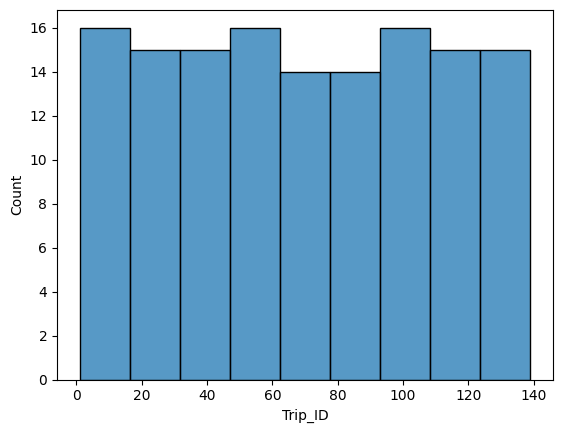

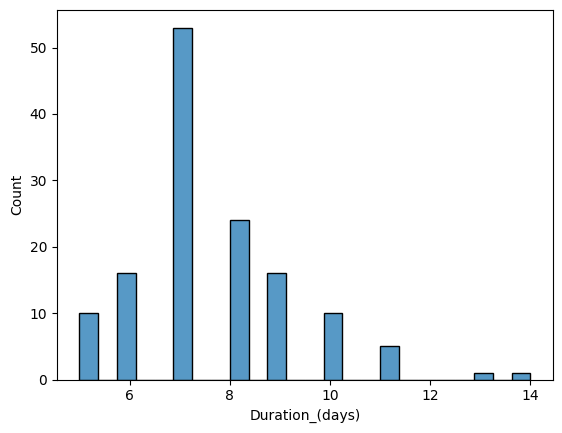

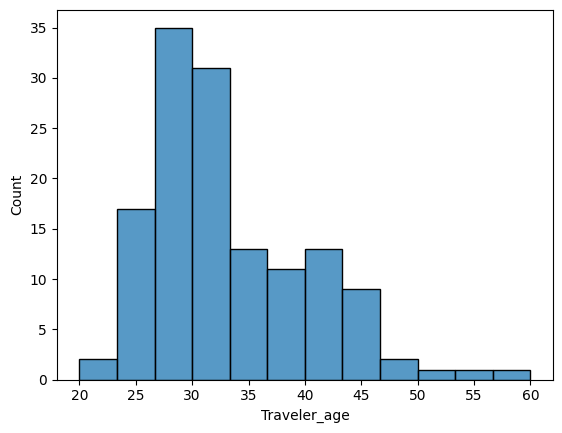

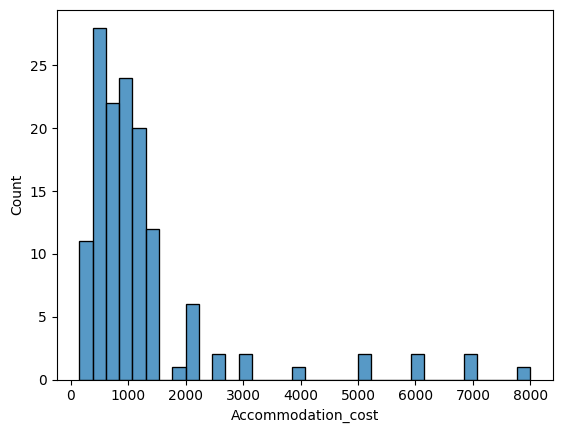

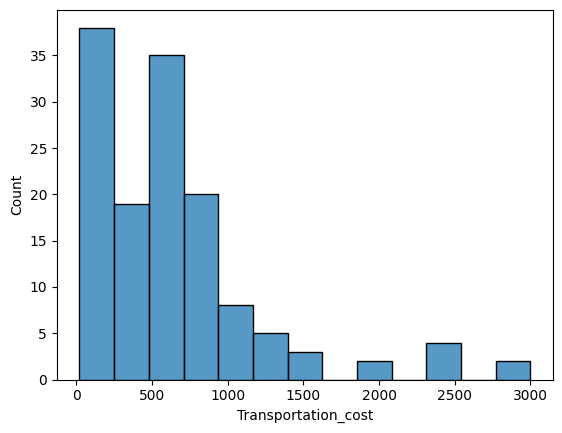

In [40]:
# histogram to understand the data distribution:
for i in df.select_dtypes(include = 'number').columns:
  sns.histplot(data = df, x = i)
  plt.show()

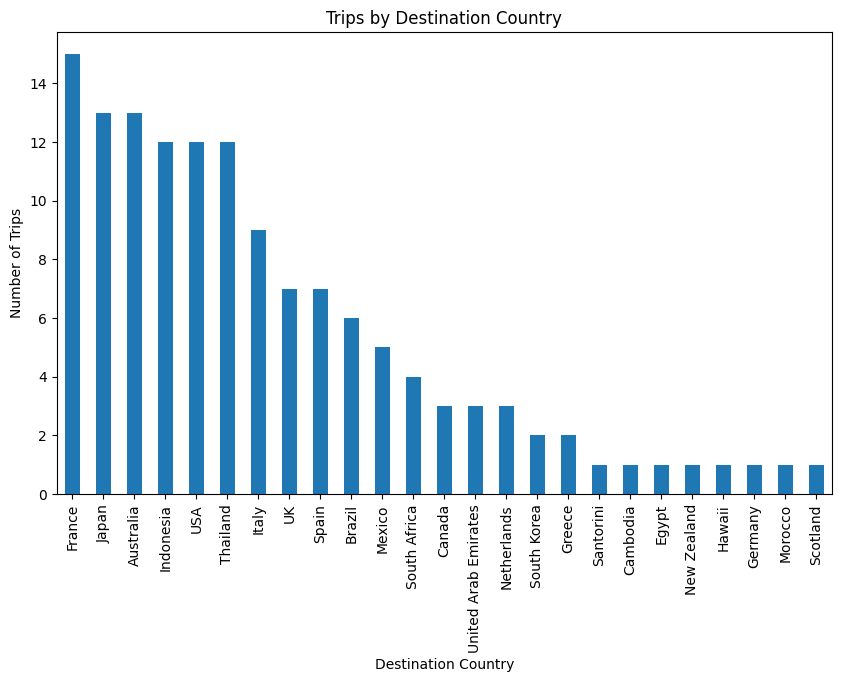

In [41]:
# Bar Chart: Number of trips to each destination.

plt.figure(figsize=(10, 6))
df['Destination_Country'].value_counts().plot(kind='bar')
plt.title('Trips by Destination Country')
plt.xlabel('Destination Country')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()

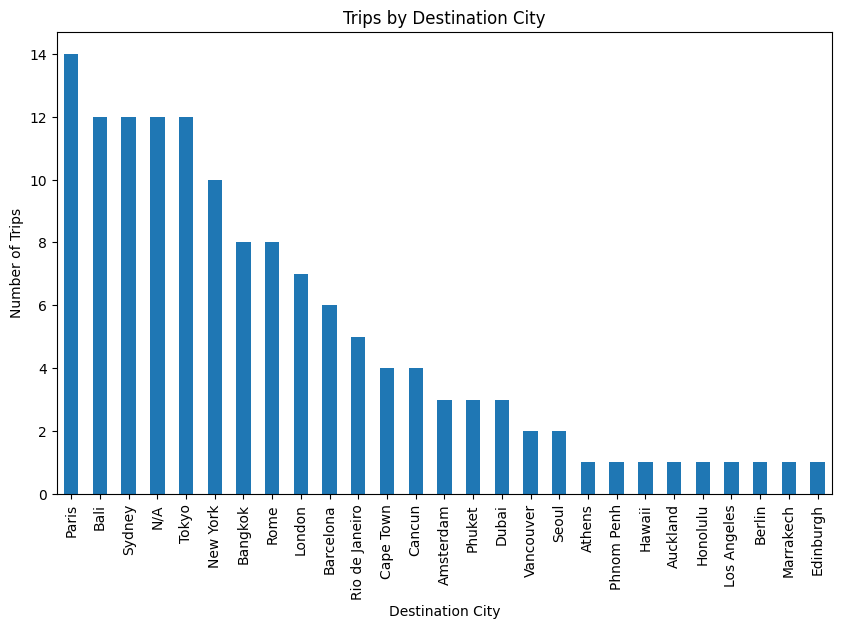

In [42]:
# Bar Chart: Number of trips to each Destination City.

plt.figure(figsize=(10, 6))
df['Destination_City'].value_counts().plot(kind='bar')
plt.title('Trips by Destination City')
plt.xlabel('Destination City')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()

In [43]:
df['Accommodation_type'].value_counts()

,count
Accommodation_type,
Hotel,59
Airbnb,30
Hostel,24
Resort,14
Villa,4
Vacation rental,3
Guesthouse,1
Riad,1


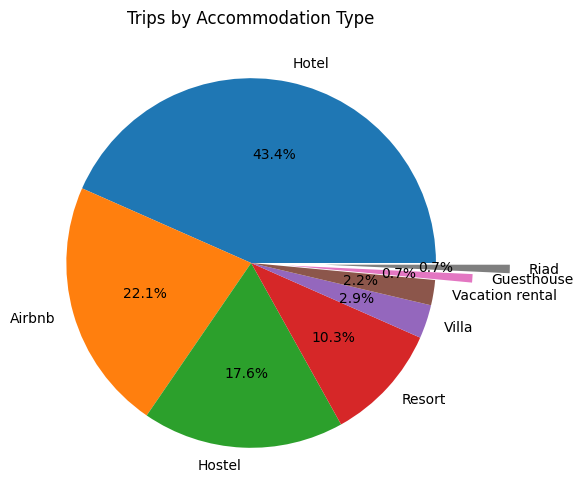

In [69]:
# Pie Chart: Proportion of trips using each type of accommodation.

plt.figure(figsize = (10, 6))
df['Accommodation_type'].value_counts().plot(kind='pie', autopct='%0.1f%%',  explode =[0,0,0,0,0,0,0.2,0.4])
plt.title('Trips by Accommodation Type')
plt.ylabel('')
plt.show()

In [45]:
df['Transportation_type'].value_counts()

,count
Transportation_type,
Airplane,75
Train,37
Car,16
Bus,6
Ferry,1
Subway,1


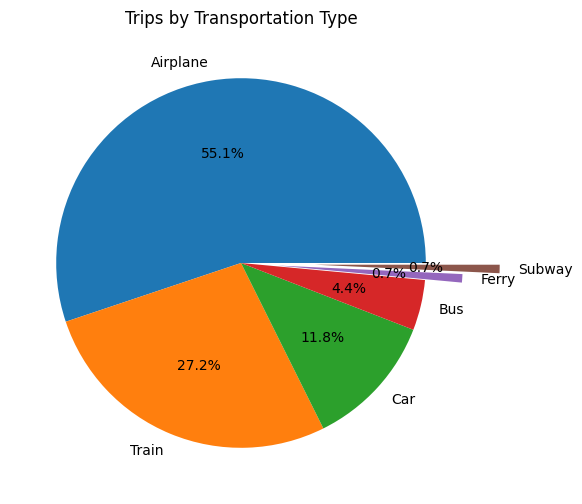

In [68]:
# Pie Chart: Proportion of trips using each type of transportation.

plt.figure(figsize = (10, 6))
df['Transportation_type'].value_counts().plot(kind='pie', autopct ='%0.1f%%', explode = [0,0,0,0,0.2,0.4])
plt.title('Trips by Transportation Type')
plt.ylabel('')
plt.show()

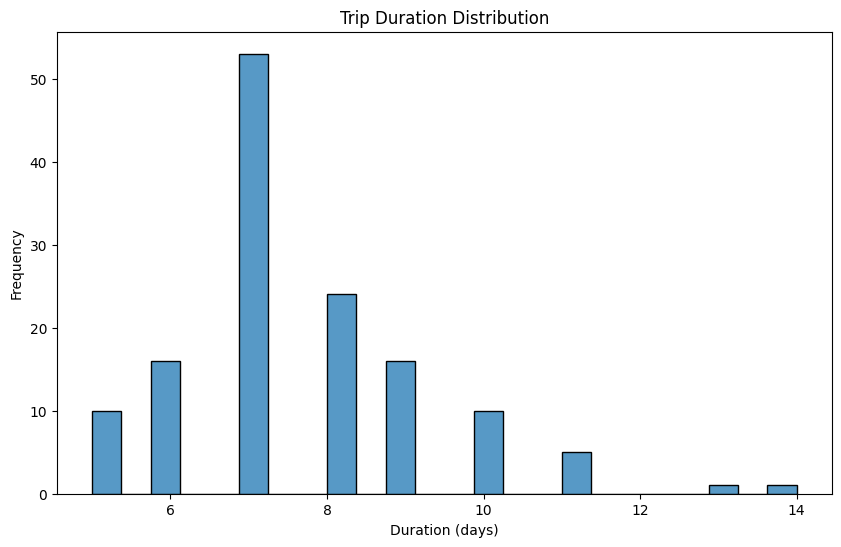

In [47]:
# Histogram: Distribution of trip durations.

plt.figure(figsize = (10, 6))
sns.histplot(df['Duration_(days)'])
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

In [48]:
df['Traveler_age'].value_counts()

,count
Traveler_age,
29,12
27,12
28,11
31,11
35,10
33,9
45,8
30,7
25,7


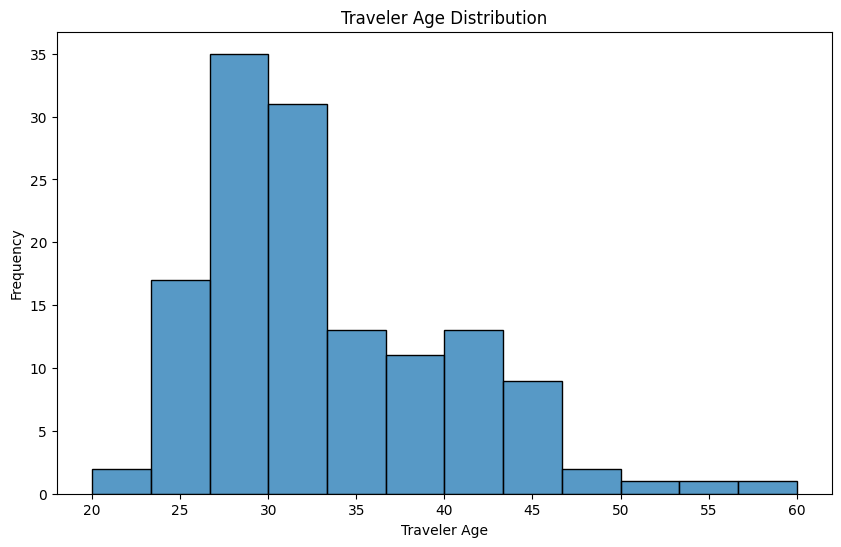

In [49]:
# Histogram: Age distribution of travelers.

plt.figure(figsize = (10, 6))
sns.histplot(df['Traveler_age'])
plt.title('Traveler Age Distribution')
plt.xlabel('Traveler Age')
plt.ylabel('Frequency')
plt.show()

In [50]:
df['Traveler_nationality'].value_counts()

,count
Traveler_nationality,
American,25
Korean,19
British,14
Canadian,9
Spanish,8
Australian,8
Chinese,8
Brazilian,5
Italian,5


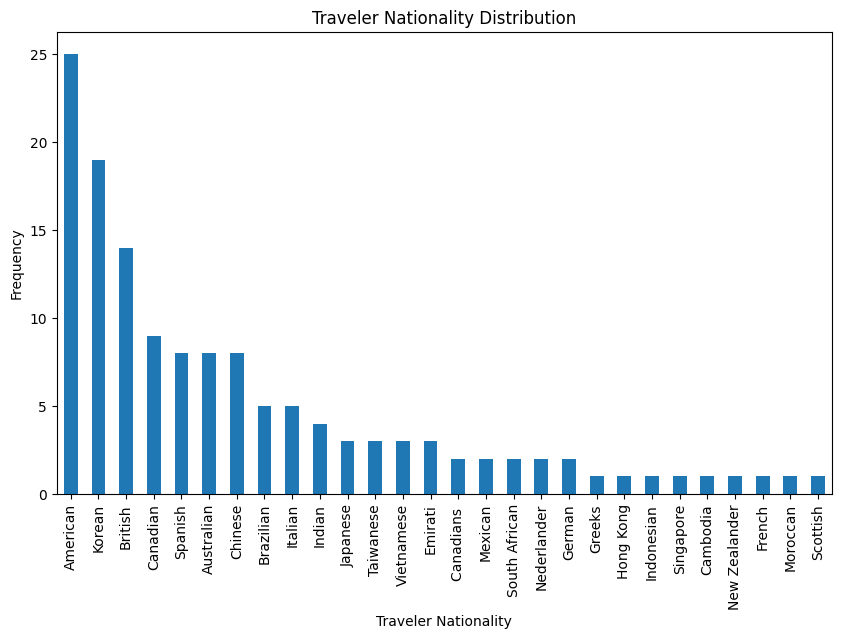

In [51]:
# Bar Chart: Number of trips by traveler nationality.

plt.figure(figsize = (10, 6))
df['Traveler_nationality'].value_counts().plot(kind = 'bar')
plt.title('Traveler Nationality Distribution')
plt.xlabel('Traveler Nationality')
plt.ylabel('Frequency')
plt.show()

In [52]:
df['Traveler_gender'].value_counts()

,count
Traveler_gender,
Female,70
Male,66


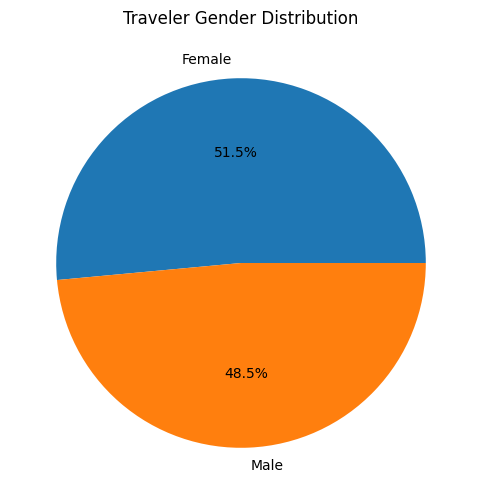

In [70]:
# Pie Chart: Proportion of male and female travelers.

plt.figure(figsize = (10, 6))
df['Traveler_gender'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.title('Traveler Gender Distribution')
plt.ylabel('')
plt.show()

In [54]:
df.sample(3)

,Trip_ID,Start_date,End_date,Duration_(days),Traveler_name,Traveler_age,Traveler_gender,Traveler_nationality,Accommodation_type,Accommodation_cost,Transportation_type,Transportation_cost,Destination_City,Destination_Country
121,122,2022-08-08,2022-08-16,8,Frank Li,41,Male,American,Hotel,1300,Airplane,600,Cancun,Mexico
122,123,2022-09-20,2022-09-30,10,Gina Lee,35,Female,Korean,Airbnb,700,Airplane,900,Athens,Greece
48,49,2023-06-20,2023-06-28,8,Laura van den Berg,31,Female,Nederlander,Hotel,1100,Airplane,700,Amsterdam,Netherlands


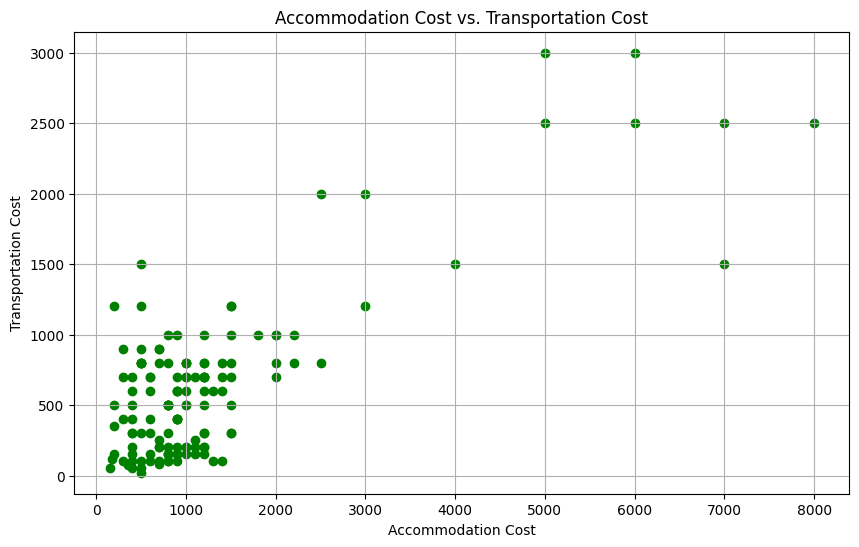

In [55]:
# Scatter Plot: Accommodation cost vs. transportation cost to identify any correlation.

plt.figure(figsize=(10, 6))
plt.scatter(df['Accommodation_cost'], df['Transportation_cost'], color='green')
plt.title('Accommodation Cost vs. Transportation Cost')
plt.xlabel('Accommodation Cost')
plt.ylabel('Transportation Cost')
plt.grid(True)
plt.show()


In [56]:
# Extract the year from 'Start_date'
df['Year'] = df['Start_date'].dt.year

# Calculate the number of trips per year
trips_per_year = df.groupby('Year').size().reset_index(name='Number_of_Trips')

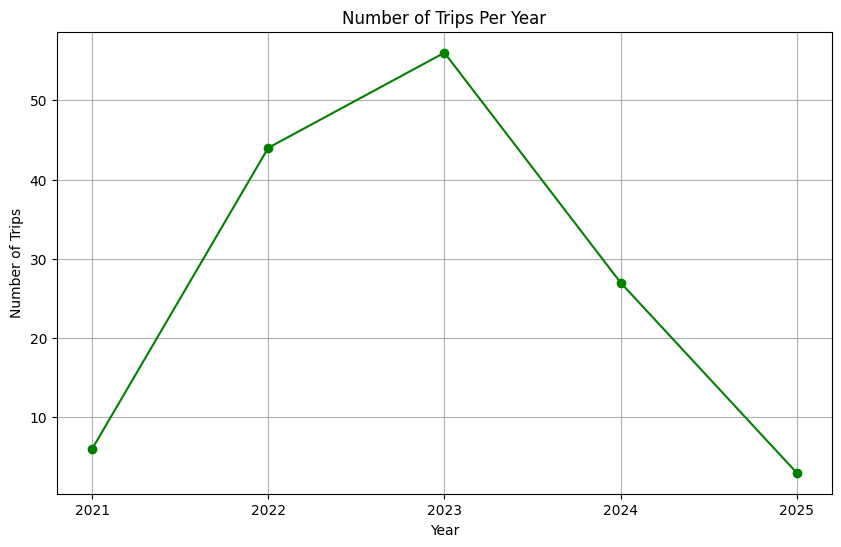

In [57]:
# Line Chart: Number of trips per month or year.
plt.figure(figsize=(10, 6))
plt.plot(trips_per_year['Year'], trips_per_year['Number_of_Trips'], marker='o', linestyle='-', color='g')
plt.title('Number of Trips Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(trips_per_year['Year'])  # Ensure all years are shown on the x-axis
plt.show()


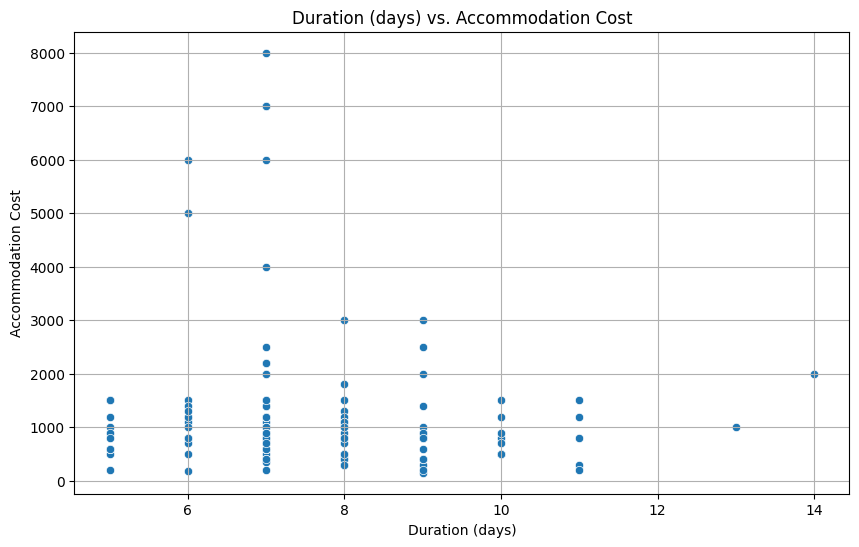

In [58]:
# Scatter Plot: To see if there's a relationship between trip duration and accommodation cost.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_(days)', y='Accommodation_cost', data=df)
plt.title('Duration (days) vs. Accommodation Cost')
plt.xlabel('Duration (days)')
plt.ylabel('Accommodation Cost')
plt.grid(True)
plt.show()


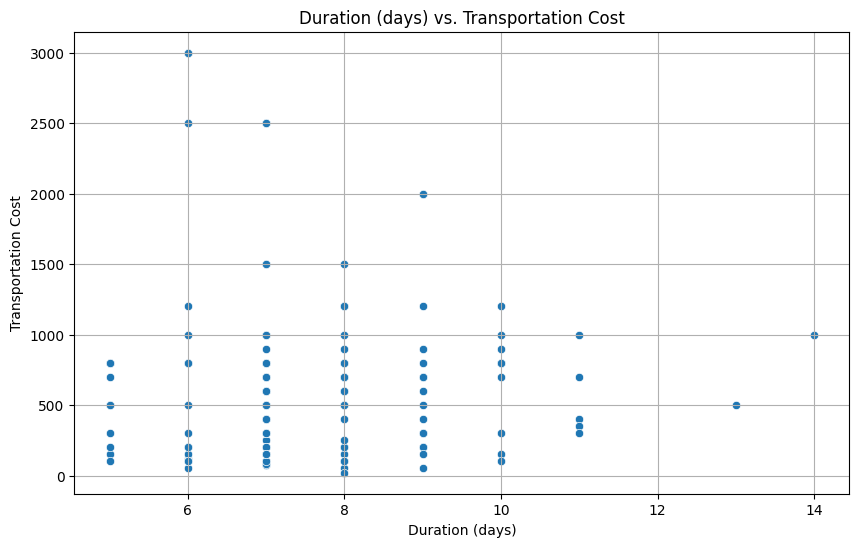

In [59]:
# Scatter Plot: To see if longer trips tend to have higher transportation costs.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_(days)', y='Transportation_cost', data=df)
plt.title('Duration (days) vs. Transportation Cost')
plt.xlabel('Duration (days)')
plt.ylabel('Transportation Cost')
plt.grid(True)
plt.show()


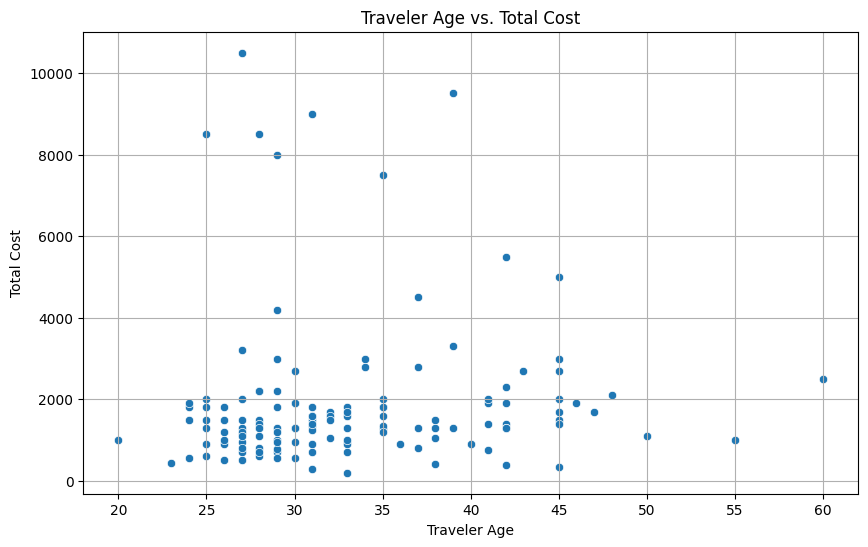

In [60]:
# Traveler Age vs. Total Cost (Accommodation + Transportation):

# Calculate the total cost for each trip
df['Total_cost'] = df['Accommodation_cost'] + df['Transportation_cost']

# Scatter Plot: To explore the relationship between traveler age and total trip cost.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Traveler_age', y='Total_cost', data=df)
plt.title('Traveler Age vs. Total Cost')
plt.xlabel('Traveler Age')
plt.ylabel('Total Cost')
plt.grid(True)
plt.show()


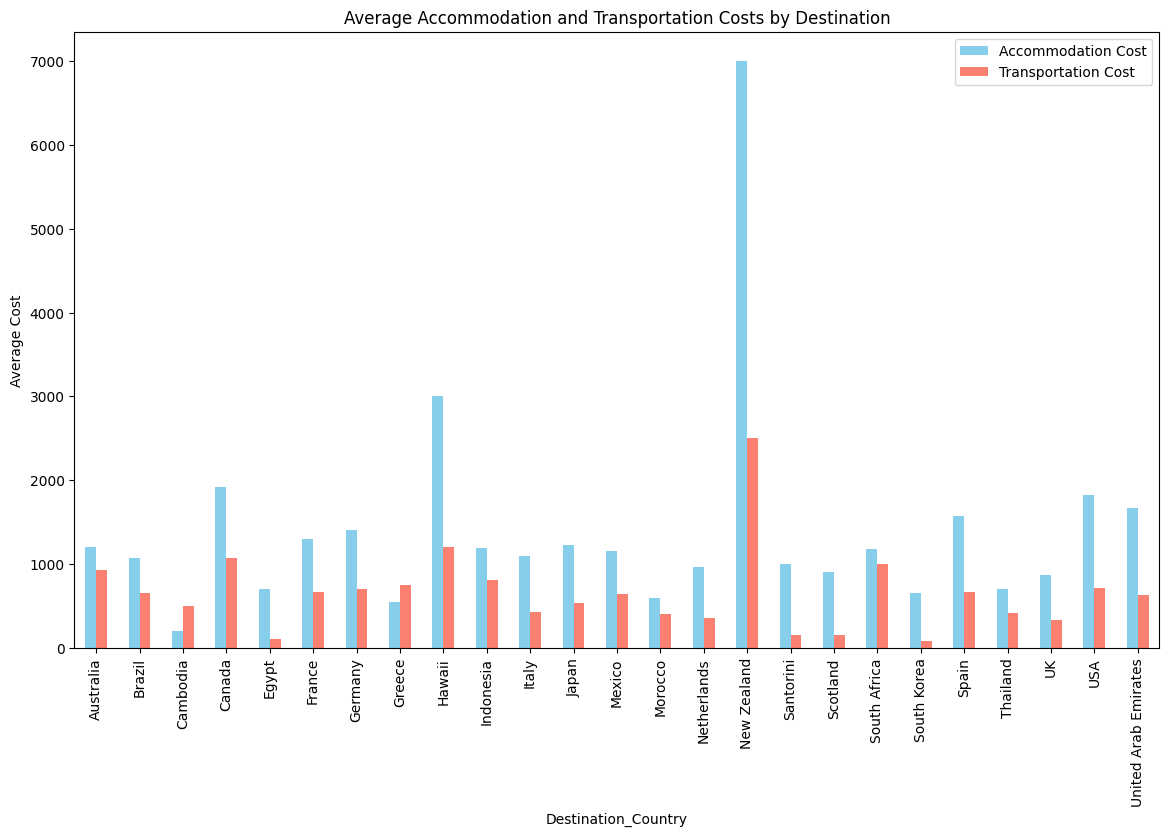

In [61]:
# Calculate the average accommodation and transportation costs for each Destination_Country
df_destination = df.groupby(['Destination_Country']).agg({
    'Accommodation_cost': 'mean',
    'Transportation_cost': 'mean'
}).reset_index()

# Bar Chart: To compare accommodation and transportation costs across different Destination_Countries.
df_destination.plot(kind='bar', x='Destination_Country', y=['Accommodation_cost', 'Transportation_cost'],
                    figsize=(14, 8), color=['skyblue', 'salmon'])
plt.title('Average Accommodation and Transportation Costs by Destination')
plt.xlabel('Destination_Country')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)
plt.legend(['Accommodation Cost', 'Transportation Cost'])
plt.show()


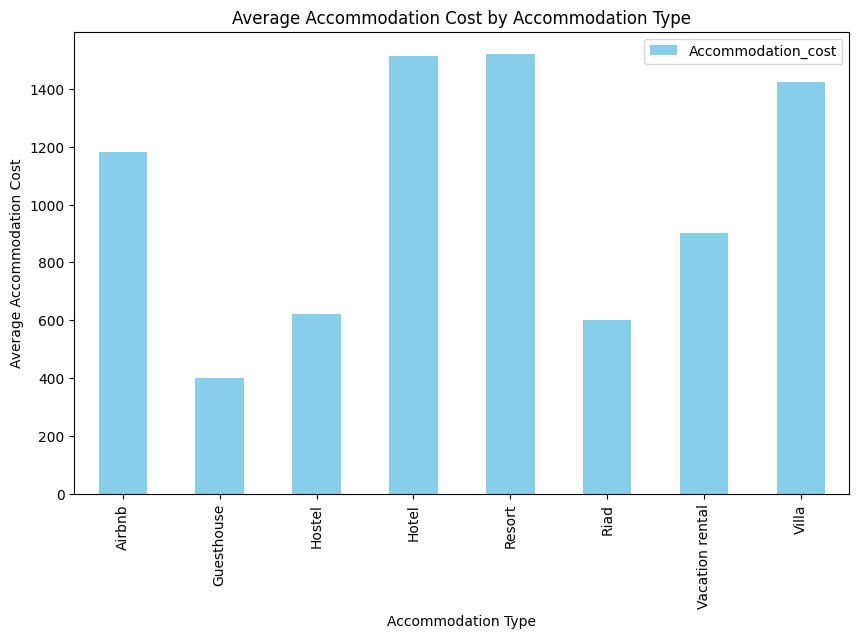

In [62]:
# Grouped Bar Charts: To analyze the average costs by different types of accommodation.
df_accommodation = df.groupby('Accommodation_type').agg({
    'Accommodation_cost': 'mean'
}).reset_index()

# Bar chart for accommodation types
df_accommodation.plot(kind='bar', x='Accommodation_type', y='Accommodation_cost', figsize=(10, 6), color='skyblue')
plt.title('Average Accommodation Cost by Accommodation Type')
plt.xlabel('Accommodation Type')
plt.ylabel('Average Accommodation Cost')
plt.xticks(rotation=90)
plt.show()

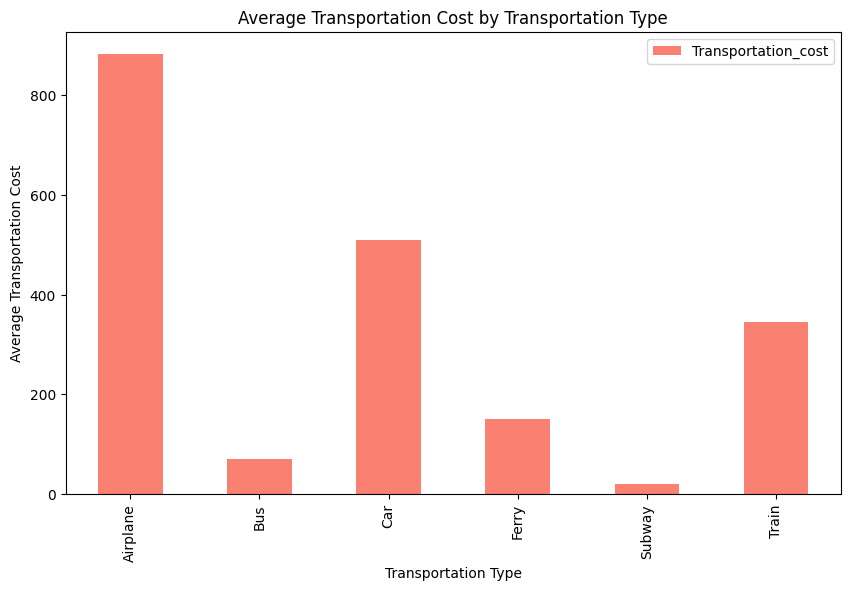

In [63]:
# Grouped Bar Charts: To analyze the average costs by different types of transportation.
df_transportation = df.groupby('Transportation_type').agg({
    'Transportation_cost': 'mean'
}).reset_index()

# Bar chart for transportation types
df_transportation.plot(kind='bar', x='Transportation_type', y='Transportation_cost', figsize=(10, 6), color='salmon')
plt.title('Average Transportation Cost by Transportation Type')
plt.xlabel('Transportation Type')
plt.ylabel('Average Transportation Cost')
plt.xticks(rotation=90)
plt.show()

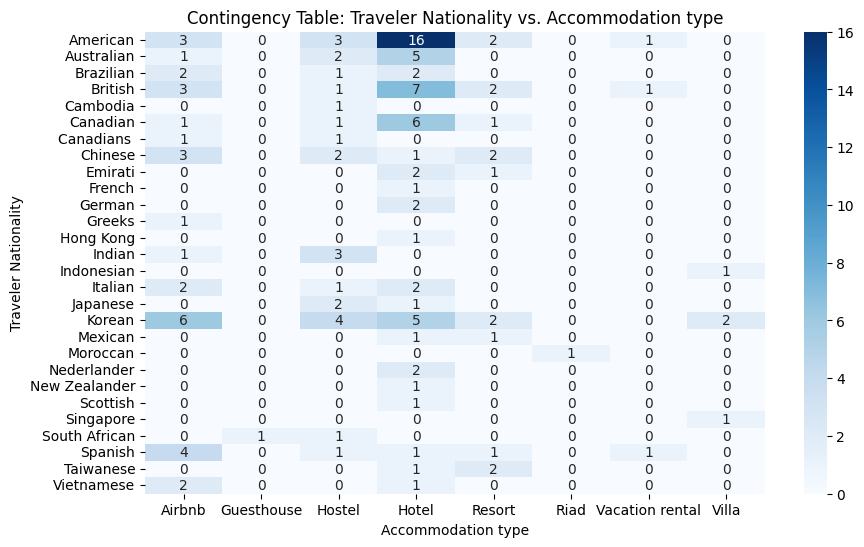

In [64]:
# Import chi2_contingency from scipy.stats to perform the chi-squared test.
from scipy.stats import chi2_contingency

# Create a contingency table:
contingency_table = pd.crosstab(df['Traveler_nationality'], df['Accommodation_type'])

## Visualize the contingency table with a heatmap:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title('Contingency Table: Traveler Nationality vs. Accommodation type')
plt.xlabel('Accommodation type')
plt.ylabel('Traveler Nationality')
plt.show()

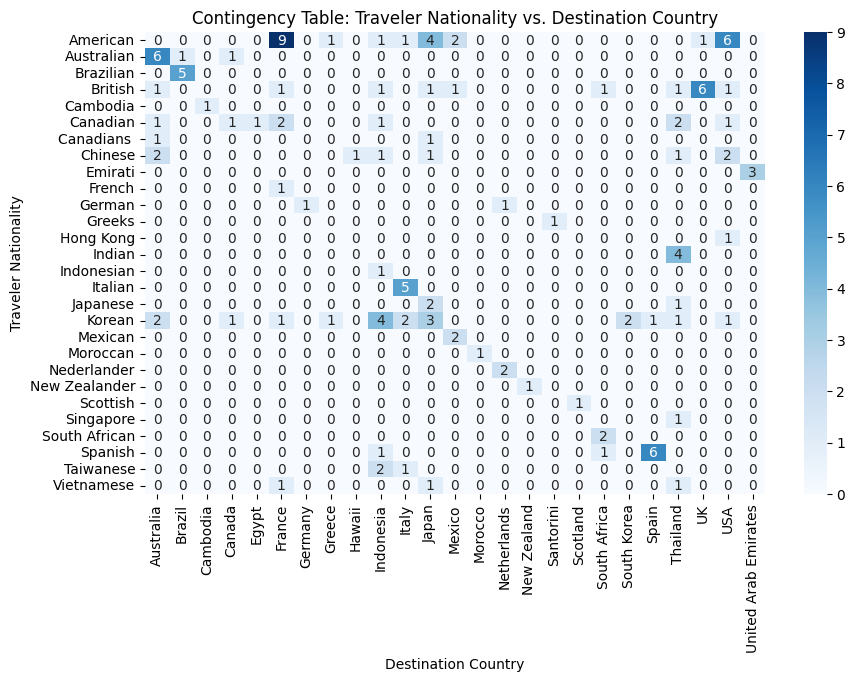

In [65]:
# Create a contingency table:
contingency_table = pd.crosstab(df['Traveler_nationality'], df['Destination_Country'])

# Visualize the contingency table with a heatmap:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title('Contingency Table: Traveler Nationality vs. Destination Country')
plt.xlabel('Destination Country')
plt.ylabel('Traveler Nationality')
plt.show()

<ipython-input-66-0b5058db3324>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Destination_Country', y='Total_cost', data=df, palette='Set3')


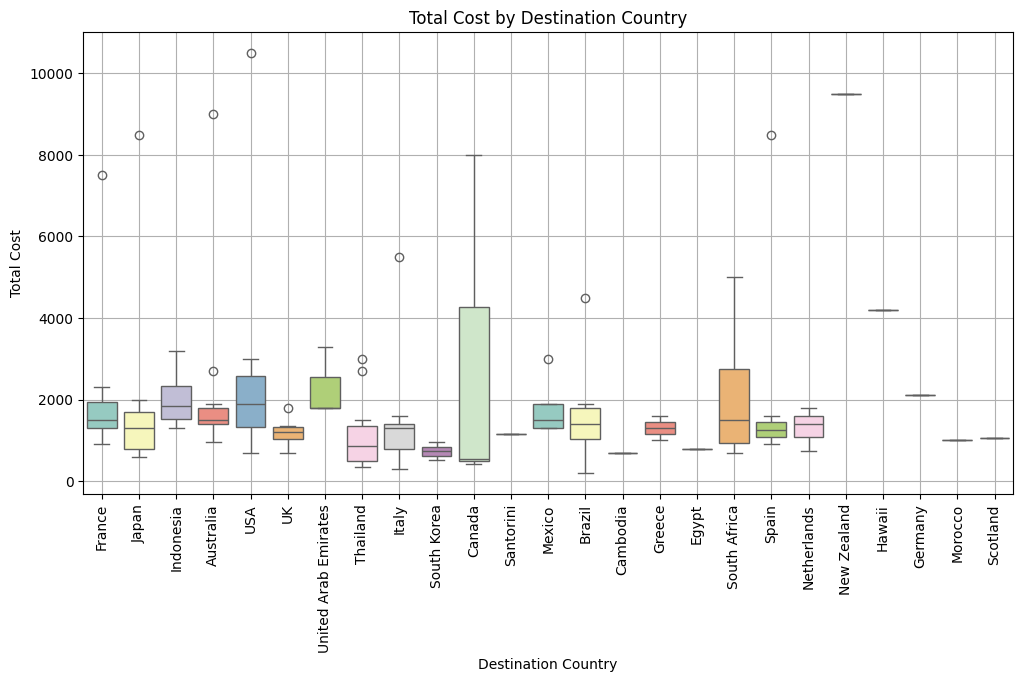

In [66]:
# Create a box plot:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Destination_Country', y='Total_cost', data=df, palette='Set3')
plt.title('Total Cost by Destination Country')
plt.xlabel('Destination Country')
plt.ylabel('Total Cost')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

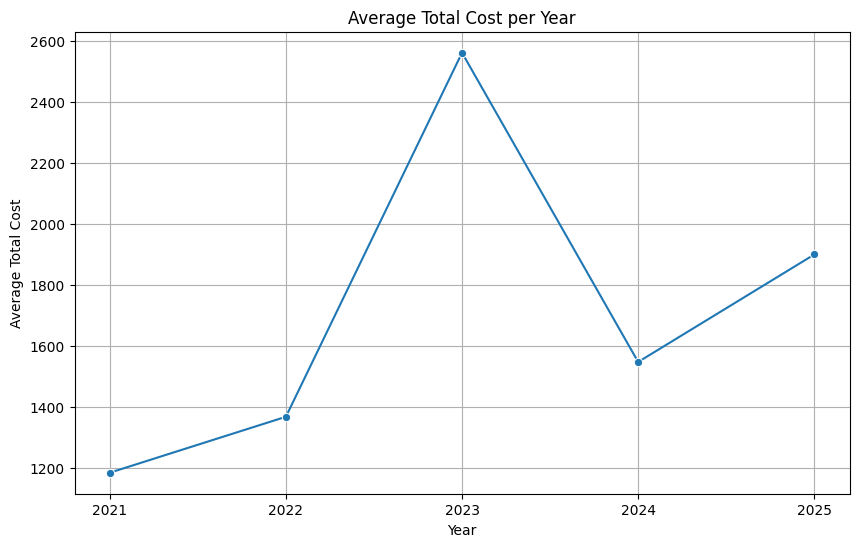

In [67]:
#Aggregate data by year:
yearly_cost = df.groupby('Year')['Total_cost'].mean().reset_index()

# Create a line plot:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_cost, x='Year', y='Total_cost', marker='o')
plt.title('Average Total Cost per Year')
plt.xlabel('Year')
plt.ylabel('Average Total Cost')
plt.xticks(yearly_cost['Year'])
plt.grid(True)
plt.show()